Epoch: 0, Error: -0.6828684101035479
Epoch: 10000, Error: -0.00019677867139022395
Epoch: 20000, Error: -2.4600332249266387e-05
Did not converge after 25000


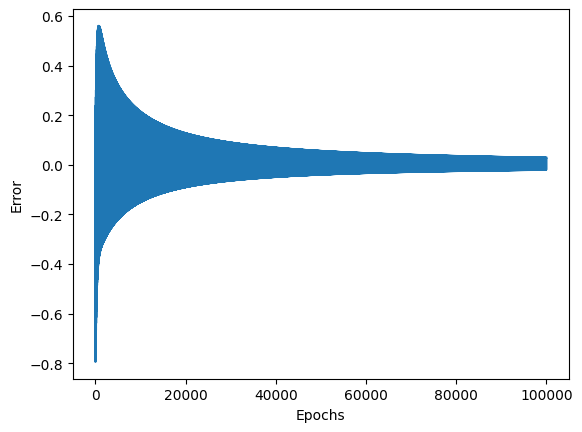

Test predictions: [0, 0, 0, 1]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:

    def __init__(self,input_size):
        self.weights=np.random.rand(input_size)
        self.bias = np.random.rand()
    
    def prediction(self,inputs):
        weighted_sum = np.dot(self.weights,inputs)+ self.bias
        return 1/(1+np.exp(-weighted_sum))
    
    def train(self,training_data,labels,epochs,lr):
        history = []
        for epoch in range(epochs+1):
            error = 0
            for inputs, label in zip(training_data,labels):
                pred = self.prediction(inputs)
                error = (label - pred)
                history.append(error)
                self.weights+= error*lr*inputs
                self.bias += error*lr

                if epoch%10000 == 0:
                    print(f"Epoch: {epoch}, Error: {error}")
                    break
                if error==0:
                    print(f"Did converge after {epochs}")
                    return history
        print(f"Did not converge after {epochs}")
        return history

input_size = 2  # Number of input features
perceptron = Perceptron(input_size)

# Training data (replace with your actual data)
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])  # Binary labels for AND gate

# Train the perceptron
hist = perceptron.train(training_data, labels,25000,0.01)

# Test the trained perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = [perceptron.prediction(inputs) for inputs in test_inputs]
plt.plot(hist)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()
result = list(map(lambda x: 1 if x >= 0.5 else 0, predictions))
# Display the results
print("Test predictions:", result)